# Importing Libraries

Import All Required Libraries and read the dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Reading the Data

In [4]:
housedata = pd.read_csv(r"C:\Users\user\Desktop\AI ML\Advance Linear Regression Assignment\train.csv")
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housedata.shape

(1460, 81)

In [6]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
housedata.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

# Data Cleaning

In [9]:
housedata.select_dtypes(include='object').isnull().sum()[housedata.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Replace NA with None in the below columns:

In [10]:
for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housedata[col]=housedata[col].fillna('None')

In [11]:
def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housedata.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housedata[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

housedata.drop(columnsToBeRemoved, axis = 1, inplace = True)

housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [12]:
housedata.select_dtypes(include='object').isnull().sum()[housedata.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

No more NULL Values in categorical variables

### Removing NULL Values in the below columns:

In [13]:
housedata['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [14]:
housedata['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [15]:
housedata['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [17]:
housedata.select_dtypes(include=['int64','float']).isnull().sum()[housedata.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

### Replace NULL Value with Median values

In [18]:
housedata['LotFrontage'] = housedata['LotFrontage'].replace(np.nan, housedata['LotFrontage'].median())
housedata['MasVnrArea'] = housedata['MasVnrArea'].replace(np.nan, housedata['MasVnrArea'].median())

In [19]:
# We are setting GarageYrBlt with 0 as of now
housedata['GarageYrBlt']=housedata['GarageYrBlt'].fillna(0)
housedata['GarageYrBlt'] = housedata['GarageYrBlt'].astype(int)

In [20]:
#Adding a new Column Remodelled

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housedata['Remodelled'] = housedata.apply(checkForRemodel, axis=1)
housedata.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,Remodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [21]:
#We are going to find the age of the building so we are adding the new column called Age 

def getAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housedata['Age'] = housedata.apply(getAge, axis=1)
housedata.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,Remodelled,Age
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [22]:
# we are now going to find weather the garage is new or old 

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housedata['OldOrNewGarage'] = housedata['GarageYrBlt'].apply(getGarageConstructionPeriod)
housedata.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,Remodelled,Age,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [23]:
#Clearing the old columns since we are using the new derived columns 

housedata.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [24]:
# we are going to remove the duplicate values for example one value is repeated several time that column will be removed 

def getHighNumericalValueCounts():
    column = []
    numerical_columns = housedata.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housedata[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housedata.drop(columnsToBeRemoved, axis = 1, inplace = True)

housedata.drop(['MoSold'], axis = 1, inplace = True)

housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,Remodelled,Age,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [25]:
housedata.shape

(1460, 49)

Earlier the count of columns are 81 now after all this eliminations we narrowed to count of 49 and we will find out the percentage of null values in each columns

In [26]:
Nullpercent = round(100*(housedata.isnull().sum()/len(housedata.index)), 2)
print(Nullpercent)

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage       0.0
LotArea           0.0
LotShape          0.0
LotConfig         0.0
Neighborhood      0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
RoofStyle         0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        0.0
MasVnrArea        0.0
ExterQual         0.0
Foundation        0.0
BsmtQual          0.0
BsmtExposure      0.0
BsmtFinType1      0.0
BsmtFinSF1        0.0
BsmtUnfSF         0.0
TotalBsmtSF       0.0
HeatingQC         0.0
1stFlrSF          0.0
2ndFlrSF          0.0
GrLivArea         0.0
BsmtFullBath      0.0
FullBath          0.0
HalfBath          0.0
BedroomAbvGr      0.0
KitchenQual       0.0
TotRmsAbvGrd      0.0
Fireplaces        0.0
FireplaceQu       0.0
GarageType        0.0
GarageFinish      0.0
GarageCars        0.0
GarageArea        0.0
WoodDeckSF        0.0
OpenPorchSF       0.0
Fence             0.0
SaleCondition     0.0
SalePrice 

We have Cleaned the dataset and there is no Null values

### Checking for Duplicate 

In [27]:
housedata[housedata.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,Remodelled,Age,OldOrNewGarage


No Duplications found on dataset

### Outlier check 

In [28]:
# Checking Outlier in numerical columns
housedata.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Remodelled,Age,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


In [32]:
# Removing the Outliers 
nn_quartile_LotArea = housedata['LotArea'].quantile(0.98)
housedata = housedata[housedata["LotArea"] < nn_quartile_LotArea]

nn_quartile_MasVnrArea = housedata['MasVnrArea'].quantile(0.98)
housedata = housedata[housedata["MasVnrArea"] < nn_quartile_MasVnrArea]

nn_quartile_TotalBsmtSF = housedata['TotalBsmtSF'].quantile(0.99)
housedata = housedata[housedata["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

nn_quartile_WoodDeckSF = housedata['WoodDeckSF'].quantile(0.99)
housedata = housedata[housedata["WoodDeckSF"] < nn_quartile_WoodDeckSF]

nn_quartile_OpenPorchSF = housedata['OpenPorchSF'].quantile(0.99)
housedata = housedata[housedata["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [33]:
freshdata = round(100*(len(housedata)/1460),2)
print(freshdata)

93.01


# Correlation between Variables

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

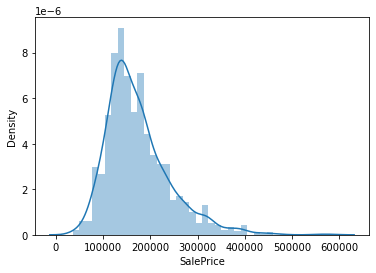

In [34]:
sns.distplot(housedata['SalePrice'])

Since the Saleprice figure is mostly towards left, we will apply the log transformation to obtain a centralized data

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

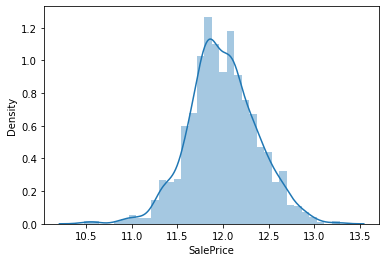

In [35]:
housedata['SalePrice']=np.log1p(housedata['SalePrice'])
sns.distplot(housedata['SalePrice'])

<Figure size 144x144 with 0 Axes>

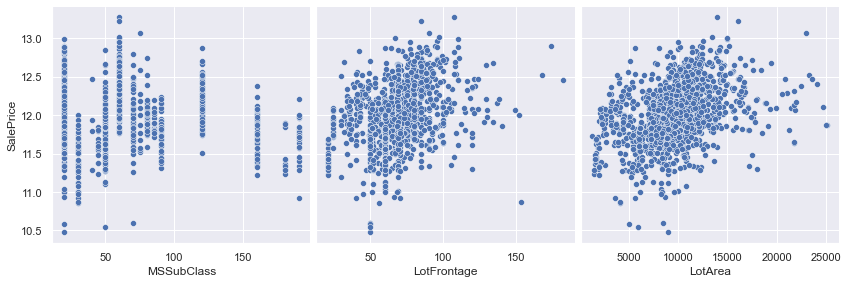

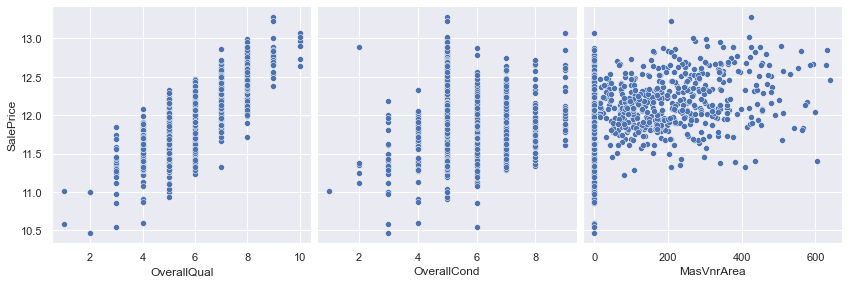

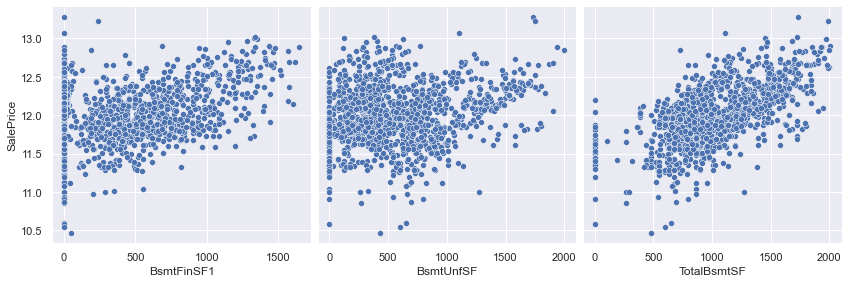

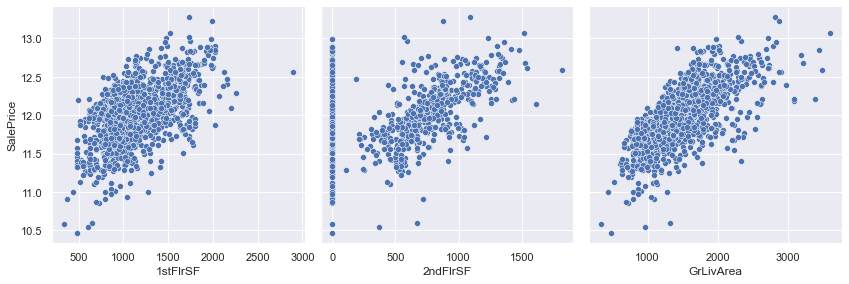

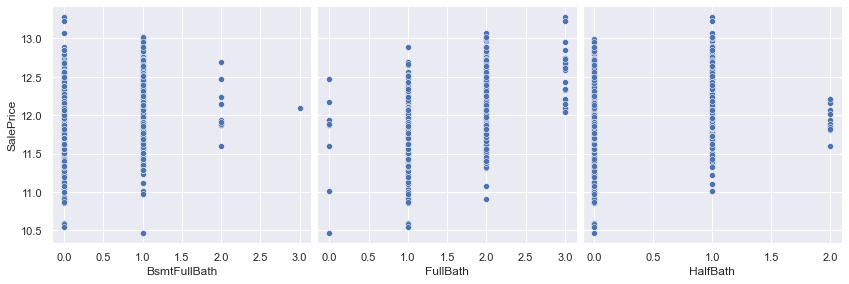

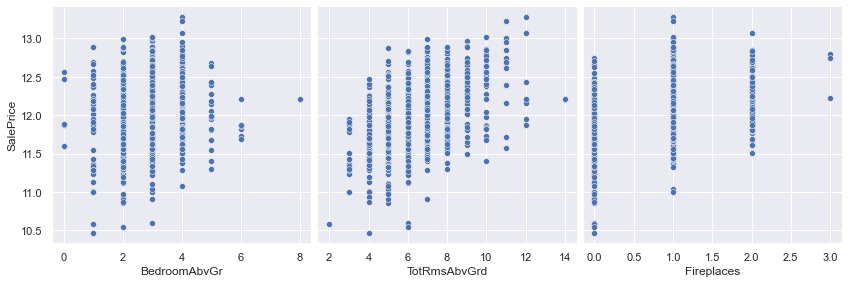

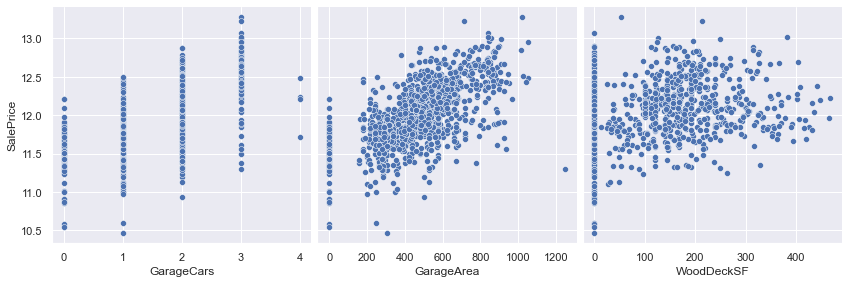

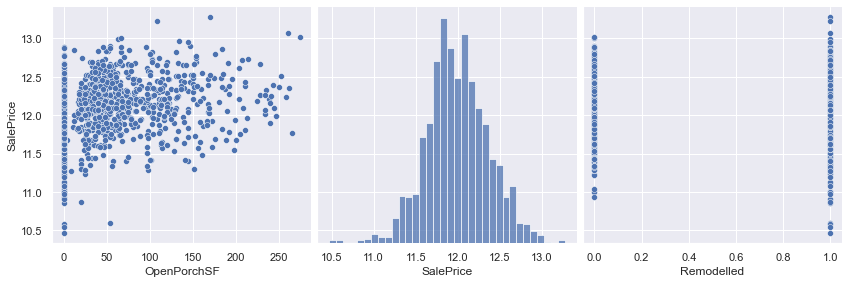

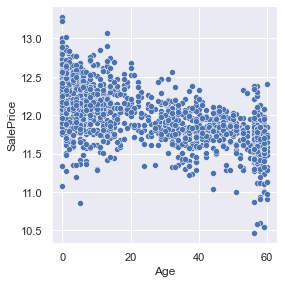

In [40]:
plt.figure(figsize=(2,2))
sns.pairplot(housedata, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['OpenPorchSF','SalePrice', 'Remodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedata, x_vars=['Age'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

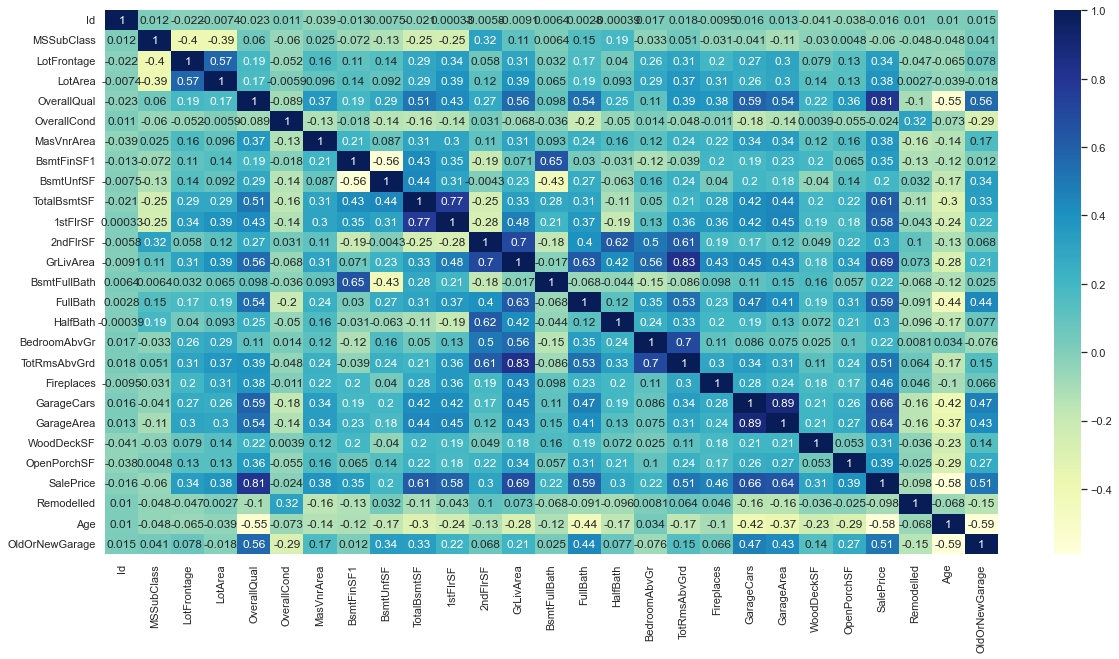

In [42]:
plt.figure(figsize = (20, 10))
sns.heatmap(housedata.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Removing Unwanted columns which have high Correlation

In [43]:
housedata.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)
housedata.shape

(1358, 47)

### Creating Dummy Variables for all Numerical data

- Before Creating Dummy Variables we have to convert the categorical data into Numerical data

In [44]:
housedata['newLotShape'] = housedata['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housedata['newExterQual'] = housedata['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housedata['newBsmtQual'] = housedata['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedata['newBsmtExposure'] = housedata['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housedata['newBsmtFinType1'] = housedata['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
housedata['newHeatingQC'] = housedata['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedata['newKitchenQual'] = housedata['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedata['newFireplaceQu'] = housedata['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedata['newGarageFinish'] = housedata['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housedata['newBldgType'] = housedata['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
housedata['newHouseStyle'] = housedata['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housedata['newFence'] = housedata['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housedata['newLotConfig'] = housedata['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 'None': 0  })
housedata['newMasVnrType'] = housedata['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housedata['newSaleCondition'] = housedata['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 'Alloca': 0, 'AdjLand': 0, 'None': 0})

housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,newHeatingQC,newKitchenQual,newFireplaceQu,newGarageFinish,newBldgType,newHouseStyle,newFence,newLotConfig,newMasVnrType,newSaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [45]:
#Removing the old columns and start working on Derived new columns
housedata = housedata.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,newHeatingQC,newKitchenQual,newFireplaceQu,newGarageFinish,newBldgType,newHouseStyle,newFence,newLotConfig,newMasVnrType,newSaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [46]:

newMSZoning = pd.get_dummies(housedata['MSZoning'], prefix='MSZoning', drop_first = True)
housedata = pd.concat([housedata, newMSZoning], axis = 1)

newNeighborhood = pd.get_dummies(housedata['Neighborhood'], prefix='Neighborhood', drop_first = True)
housedata = pd.concat([housedata, newNeighborhood], axis = 1)


newRoofStyle = pd.get_dummies(housedata['RoofStyle'], prefix='RoofStyle', drop_first = True)
housedata = pd.concat([housedata, newRoofStyle], axis = 1)

newExterior1st = pd.get_dummies(housedata['Exterior1st'], prefix='Exterior1st', drop_first = True)
housedata = pd.concat([housedata, newExterior1st], axis = 1)

newExterior2nd = pd.get_dummies(housedata['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housedata = pd.concat([housedata, newExterior2nd], axis = 1)

newFoundation = pd.get_dummies(housedata['Foundation'], prefix='Foundation', drop_first = True)
housedata = pd.concat([housedata, newFoundation], axis = 1)

newGarageType = pd.get_dummies(housedata['GarageType'], prefix='GarageType', drop_first = True)
housedata = pd.concat([housedata, newGarageType], axis = 1)

housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [47]:
housedata = housedata.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType'], axis=1)

housedata.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [48]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


In [49]:
housedata.shape

(1358, 112)

# Divide the data to test & train

- splitting the data for test and train
- For Scaling sklearn package is used

In [50]:
X = housedata.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [51]:
y = housedata['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [52]:
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [55]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
973,0.067234,0.835613,1.831643,2.256275,-0.526853,0.926193,-0.428382,2.783100,2.579957,2.542204,...,1.142630,-0.134131,-0.060791,-0.047053,-1.190113,-0.119121,4.078770,-0.08168,-0.616507,-0.24853
1168,-0.169305,-0.863596,-0.883846,-0.017863,0.365250,-0.625900,0.022494,-0.230494,-0.354188,-0.495287,...,-0.875174,-0.134131,-0.060791,-0.047053,-1.190113,-0.119121,-0.245172,-0.08168,1.622041,-0.24853
318,-0.878923,-0.142719,0.820250,-0.017863,1.257352,0.687410,0.412442,0.168056,0.522348,0.257470,...,-0.875174,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.24853
286,0.422043,0.938596,2.476211,0.740183,3.041556,-0.625900,-1.013304,2.125843,1.197625,1.610079,...,-0.875174,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.24853
852,-0.878923,0.938596,0.440978,-0.017863,2.149454,-0.625900,0.273523,-0.729263,0.440255,0.842620,...,-0.875174,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.24853


In [56]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
167,-0.642384,-0.451667,-0.253109,-0.775908,0.365250,-0.6259,-1.013304,0.955832,-0.131744,-0.468823,...,-0.875174,-0.134131,-0.060791,-0.047053,-1.190113,-0.119121,-0.245172,-0.08168,1.622041,-0.24853
1316,-0.169305,-0.245702,1.000896,-0.017863,1.257352,-0.6259,-1.013304,0.641188,-0.489244,-0.218884,...,-0.875174,-0.134131,-0.060791,-0.047053,-1.190113,-0.119121,-0.245172,-0.08168,1.622041,-0.24853
808,-0.878923,-0.451667,-0.784256,-0.775908,-0.526853,-0.6259,-1.013304,0.783360,-0.327707,-0.686417,...,-0.875174,-0.134131,-0.060791,-0.047053,-1.190113,-0.119121,-0.245172,-0.08168,1.622041,-0.24853
531,0.776853,0.011754,-0.664748,-0.775908,-0.526853,-0.6259,1.284950,-1.300285,-0.197948,-0.542334,...,-0.875174,-0.134131,-0.060791,-0.047053,-1.190113,-0.119121,-0.245172,-0.08168,1.622041,-0.24853
756,-0.169305,-1.224034,-0.328355,-0.775908,1.257352,-0.6259,-1.013304,0.298575,-0.878521,-1.298032,...,-0.875174,-0.134131,-0.060791,-0.047053,-1.190113,-0.119121,-0.245172,-0.08168,1.622041,-0.24853


# RFE:Recursive Feature Elimination

In [57]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# RFE will find out the best 50 from 111 features 
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [58]:
col = X_train.columns[rfe.support_]
temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)
temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,BsmtFullBath,True,1
9,FullBath,True,1


In [59]:
X_train_rfe = X_train[col]

In [60]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [62]:
X_test.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,...,Exterior1st_CemntBd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd
167,-0.253109,-0.775908,0.365250,-1.013304,-0.131744,-0.468823,-0.797204,-1.073277,-0.800263,-1.008133,...,-0.201527,2.550051,-0.201527,2.574726,1.129029,-0.875174,-0.134131,-1.190113,-0.245172,1.622041
1316,1.000896,-0.017863,1.257352,-1.013304,-0.489244,-0.218884,1.094236,0.813764,-0.800263,-1.008133,...,-0.201527,2.550051,-0.201527,2.574726,-0.885717,-0.875174,-0.134131,-1.190113,-0.245172,1.622041
808,-0.784256,-0.775908,-0.526853,-1.013304,-0.327707,-0.686417,-0.797204,-1.231960,-0.800263,-1.008133,...,-0.201527,-0.392149,-0.201527,-0.388391,1.129029,-0.875174,-0.134131,-1.190113,-0.245172,1.622041
531,-0.664748,-0.775908,-0.526853,1.284950,-0.197948,-0.542334,-0.797204,-1.126886,1.157858,-1.008133,...,-0.201527,-0.392149,-0.201527,-0.388391,1.129029,-0.875174,-0.134131,-1.190113,-0.245172,1.622041
756,-0.328355,-0.775908,1.257352,-1.013304,-0.878521,-1.298032,0.544648,-0.468566,-0.800263,-1.008133,...,-0.201527,-0.392149,-0.201527,-0.388391,-0.885717,-0.875174,-0.134131,-1.190113,-0.245172,1.622041


# Ridge Regression

In [73]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
ridgefinal = pd.DataFrame(ridge_model_cv.cv_results_)
ridgefinal = ridgefinal[ridgefinal['param_alpha']<=500]
ridgefinal[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
16,5.0,-0.078534,-0.084748,1
17,6.0,-0.078613,-0.084754,2
18,7.0,-0.078682,-0.084772,3
15,4.0,-0.078449,-0.084775,4
19,8.0,-0.078744,-0.084791,5
20,9.0,-0.078804,-0.084814,6
14,3.0,-0.078366,-0.084828,7
21,10.0,-0.078861,-0.084843,8
13,2.0,-0.078286,-0.084894,9
12,1.0,-0.078208,-0.084986,10


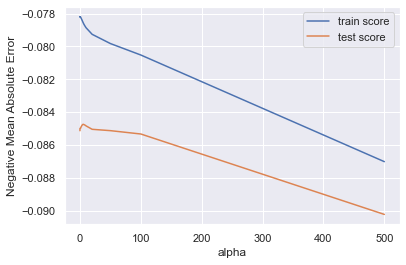

In [78]:
ridgefinal['param_alpha'] = ridgefinal['param_alpha'].astype('int32')

plt.plot(ridgefinal['param_alpha'], ridgefinal['mean_train_score'])
plt.plot(ridgefinal['param_alpha'], ridgefinal['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [81]:
ridge_model_cv.best_estimator_

Ridge(alpha=5.0)

In [82]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.01975195,  0.07352588,  0.04358789,  0.03156858,  0.03896337,
        0.01064728, -0.00021244,  0.09860795,  0.01298539,  0.01662253,
        0.01845819,  0.02628478,  0.00906492, -0.0136291 , -0.02054222,
        0.01566476,  0.02269114,  0.01086417,  0.01893893,  0.01946167,
        0.0168273 ,  0.01482215, -0.02481284,  0.01751659,  0.07510643,
        0.03160535,  0.12241892,  0.09584418,  0.02052634, -0.01068279,
       -0.00784397, -0.01322934, -0.01154209, -0.00526407, -0.0079229 ,
        0.01939706, -0.02202673,  0.01430916, -0.00931488,  0.00942798,
       -0.0204404 , -0.02841269,  0.02541606,  0.02571555,  0.01715729,
        0.03094609,  0.01813834,  0.02190524,  0.01405494,  0.01918746])

In [83]:
mean_squared_error(y_test, ridge.predict(X_test))

0.011000494608608287

In [84]:
ridgedataframe = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridgedataframe.reset_index(drop=True, inplace=True)
ridgedataframe

,Features,Coefficient
0,LotArea,0.0198
1,OverallQual,0.0735
2,OverallCond,0.0436
3,BsmtFinSF1,0.0316
4,TotalBsmtSF,0.0390
5,1stFlrSF,0.0106
6,2ndFlrSF,-0.0002
7,GrLivArea,0.0986
8,BsmtFullBath,0.0130
9,FullBath,0.0166


In [85]:
#Storing the feature and coefficient values to dictionary
ridgedict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridgedict

{'LotArea': 0.0198,
 'OverallQual': 0.0735,
 'OverallCond': 0.0436,
 'BsmtFinSF1': 0.0316,
 'TotalBsmtSF': 0.039,
 '1stFlrSF': 0.0106,
 '2ndFlrSF': -0.0002,
 'GrLivArea': 0.0986,
 'BsmtFullBath': 0.013,
 'FullBath': 0.0166,
 'HalfBath': 0.0185,
 'GarageCars': 0.0263,
 'WoodDeckSF': 0.0091,
 'Remodelled': -0.0136,
 'Age': -0.0205,
 'OldOrNewGarage': 0.0157,
 'newBsmtQual': 0.0227,
 'newBsmtExposure': 0.0109,
 'newHeatingQC': 0.0189,
 'newKitchenQual': 0.0195,
 'newFireplaceQu': 0.0168,
 'newGarageFinish': 0.0148,
 'newBldgType': -0.0248,
 'newSaleCondition': 0.0175,
 'MSZoning_FV': 0.0751,
 'MSZoning_RH': 0.0316,
 'MSZoning_RL': 0.1224,
 'MSZoning_RM': 0.0958,
 'Neighborhood_Crawfor': 0.0205,
 'Neighborhood_Edwards': -0.0107,
 'Neighborhood_Gilbert': -0.0078,
 'Neighborhood_IDOTRR': -0.0132,
 'Neighborhood_MeadowV': -0.0115,
 'Neighborhood_NAmes': -0.0053,
 'Neighborhood_NWAmes': -0.0079,
 'Neighborhood_NridgHt': 0.0194,
 'Neighborhood_OldTown': -0.022,
 'Neighborhood_StoneBr': 0.0143,


In [86]:
X_train_ridge = X_train[ridgedataframe.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [87]:
def find(x):
    return ridgedict[x]

tempdataframe = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
tempdataframe = tempdataframe.loc[tempdataframe['rfe_support'] == True]
tempdataframe.reset_index(drop=True, inplace=True)

tempdataframe['Coefficient'] = tempdataframe['Features'].apply(find)
tempdataframe = tempdataframe.sort_values(by=['Coefficient'], ascending=False)
tempdataframe = tempdataframe.head(10)
tempdataframe

,Features,rfe_support,rfe_ranking,Coefficient
12,MSZoning_RL,True,1,0.1224
4,GrLivArea,True,1,0.0986
13,MSZoning_RM,True,1,0.0958
10,MSZoning_FV,True,1,0.0751
0,OverallQual,True,1,0.0735
1,OverallCond,True,1,0.0436
3,TotalBsmtSF,True,1,0.0390
2,BsmtFinSF1,True,1,0.0316
11,MSZoning_RH,True,1,0.0316
5,GarageCars,True,1,0.0263


In [88]:
tempdataframe = tempdataframe.sort_values((['Coefficient']), axis = 0, ascending = False)
tempdataframe

,Features,rfe_support,rfe_ranking,Coefficient
12,MSZoning_RL,True,1,0.1224
4,GrLivArea,True,1,0.0986
13,MSZoning_RM,True,1,0.0958
10,MSZoning_FV,True,1,0.0751
0,OverallQual,True,1,0.0735
1,OverallCond,True,1,0.0436
3,TotalBsmtSF,True,1,0.0390
2,BsmtFinSF1,True,1,0.0316
11,MSZoning_RH,True,1,0.0316
5,GarageCars,True,1,0.0263


# Lasso Regression

In [92]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

folds = 5

lassomodel = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lassomodel.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
lassoresult = pd.DataFrame(lassomodel.cv_results_)
lassoresult[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.078259,-0.084971,1
2,0.0003,-0.078368,-0.085032,2
0,0.0001,-0.078176,-0.085045,3
3,0.0004,-0.078485,-0.085106,4
4,0.0005,-0.078607,-0.085139,5
5,0.001,-0.079278,-0.085550,6
6,0.002,-0.080626,-0.086331,7
7,0.003,-0.081412,-0.086648,8
8,0.004,-0.082004,-0.087061,9
9,0.005,-0.082698,-0.087776,10


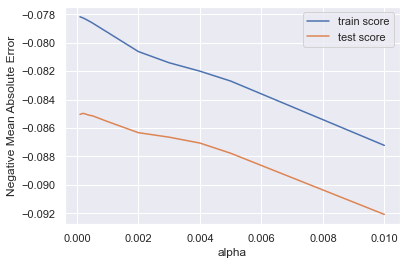

In [94]:
lassoresult['param_alpha'] = lassoresult['param_alpha'].astype('float64')

# plotting

plt.plot(lassoresult['param_alpha'], lassoresult['mean_train_score'])
plt.plot(lassoresult['param_alpha'], lassoresult['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')


plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [95]:
lassomodel.best_estimator_

Lasso(alpha=0.0002)

In [96]:
alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.01909556,  0.07363721,  0.04275121,  0.031931  ,  0.03868209,
       -0.        , -0.01227055,  0.11435595,  0.01255018,  0.01468805,
        0.01687763,  0.02726282,  0.00895402, -0.01360897, -0.02101408,
        0.0156425 ,  0.02278192,  0.01109297,  0.01905055,  0.01900027,
        0.0166182 ,  0.01510547, -0.02404048,  0.01709023,  0.09042237,
        0.03907619,  0.15298833,  0.12042161,  0.02044052, -0.01050085,
       -0.00740526, -0.0106368 , -0.01108642, -0.00498989, -0.00740538,
        0.01920056, -0.0209264 ,  0.01402513, -0.00931658,  0.00965212,
       -0.01706122, -0.0280589 ,  0.02205074,  0.02497109,  0.01619039,
        0.02978516,  0.01766952,  0.02100637,  0.01336983,  0.01827886])

In [98]:
mean_squared_error(y_test, lasso.predict(X_test))

0.011195981595568854

In [99]:
lassodataframe = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lassodataframe = lassodataframe[lassodataframe['Coefficient'] != 0.00]
lassodataframe.reset_index(drop=True, inplace=True)
lassodataframe

,Features,Coefficient
0,LotArea,0.0191
1,OverallQual,0.0736
2,OverallCond,0.0428
3,BsmtFinSF1,0.0319
4,TotalBsmtSF,0.0387
5,2ndFlrSF,-0.0123
6,GrLivArea,0.1144
7,BsmtFullBath,0.0126
8,FullBath,0.0147
9,HalfBath,0.0169


In [100]:
lassodict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lassodict

{'LotArea': 0.01909555883145225,
 'OverallQual': 0.07363721369761923,
 'OverallCond': 0.04275120574494732,
 'BsmtFinSF1': 0.03193100364060815,
 'TotalBsmtSF': 0.03868208678356551,
 '1stFlrSF': -0.0,
 '2ndFlrSF': -0.012270548892457652,
 'GrLivArea': 0.11435594863473703,
 'BsmtFullBath': 0.012550175639661126,
 'FullBath': 0.014688053534117361,
 'HalfBath': 0.01687763298336817,
 'GarageCars': 0.027262818812632896,
 'WoodDeckSF': 0.008954015304526532,
 'Remodelled': -0.013608971279846501,
 'Age': -0.021014082808443968,
 'OldOrNewGarage': 0.015642499927812272,
 'newBsmtQual': 0.022781919051799677,
 'newBsmtExposure': 0.0110929667657531,
 'newHeatingQC': 0.01905055303002324,
 'newKitchenQual': 0.019000272720593778,
 'newFireplaceQu': 0.016618197614747924,
 'newGarageFinish': 0.01510546843348215,
 'newBldgType': -0.02404048145943682,
 'newSaleCondition': 0.017090226151846757,
 'MSZoning_FV': 0.09042237089590555,
 'MSZoning_RH': 0.039076186751254974,
 'MSZoning_RL': 0.15298832821644104,
 'MSZo

### RFE 

In [101]:
Xtrainlasso = X_train[lassodataframe.Features]

lm = LinearRegression()
lm.fit(Xtrainlasso, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(Xtrainlasso, y_train)

In [102]:
def find(x):
    return lassodict[x]

temp2dataframe = pd.DataFrame(list(zip( Xtrainlasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2dataframe = temp2dataframe.loc[temp2dataframe['rfe_support'] == True]
temp2dataframe.reset_index(drop=True, inplace=True)

temp2dataframe['Coefficient'] = temp2dataframe['Features'].apply(find)
temp2dataframe = temp2dataframe.sort_values(by=['Coefficient'], ascending=False)
temp2dataframe = temp2dataframe.head(10)
temp2dataframe

,Features,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.152988
11,MSZoning_RM,True,1,0.120422
4,GrLivArea,True,1,0.114356
8,MSZoning_FV,True,1,0.090422
0,OverallQual,True,1,0.073637
1,OverallCond,True,1,0.042751
9,MSZoning_RH,True,1,0.039076
3,TotalBsmtSF,True,1,0.038682
2,BsmtFinSF1,True,1,0.031931
14,Foundation_PConc,True,1,0.029785


# Conclusion

#### The Table shows higher positive coeffecient results in high sales value

#### Some of those features are:-
 - MSZoning_RL
 - MSZoning_RM
 - GrLivArea
 - MSZoning_FV

#### The Mean Squared Error of Lasso is slightly lower than that of Ridge
- Also,Lasso has a better edge over Ridge.
- the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house